Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("flight_price.xlsx")

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.size

117513

In [7]:
df.shape

(10683, 11)

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

Text(0.5, 1.0, 'the distribution of flight prices in the dataset')

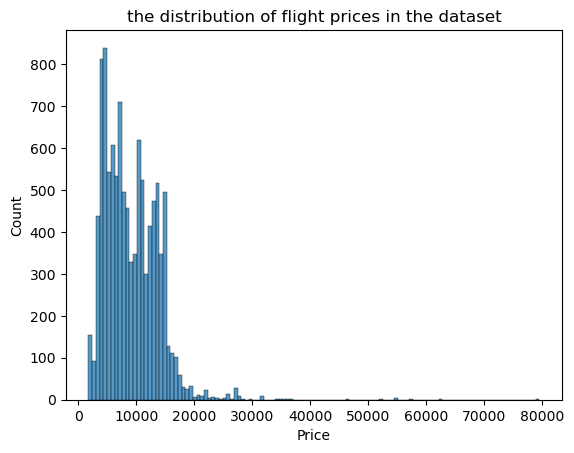

In [8]:
sns.histplot(data=df,x='Price')
plt.title("the distribution of flight prices in the dataset")

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [9]:
df["Price"].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

As from above we can conclude that the minimum price is 1759 and maximum price is 79512.

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

<AxesSubplot: xlabel='Airline', ylabel='Price'>

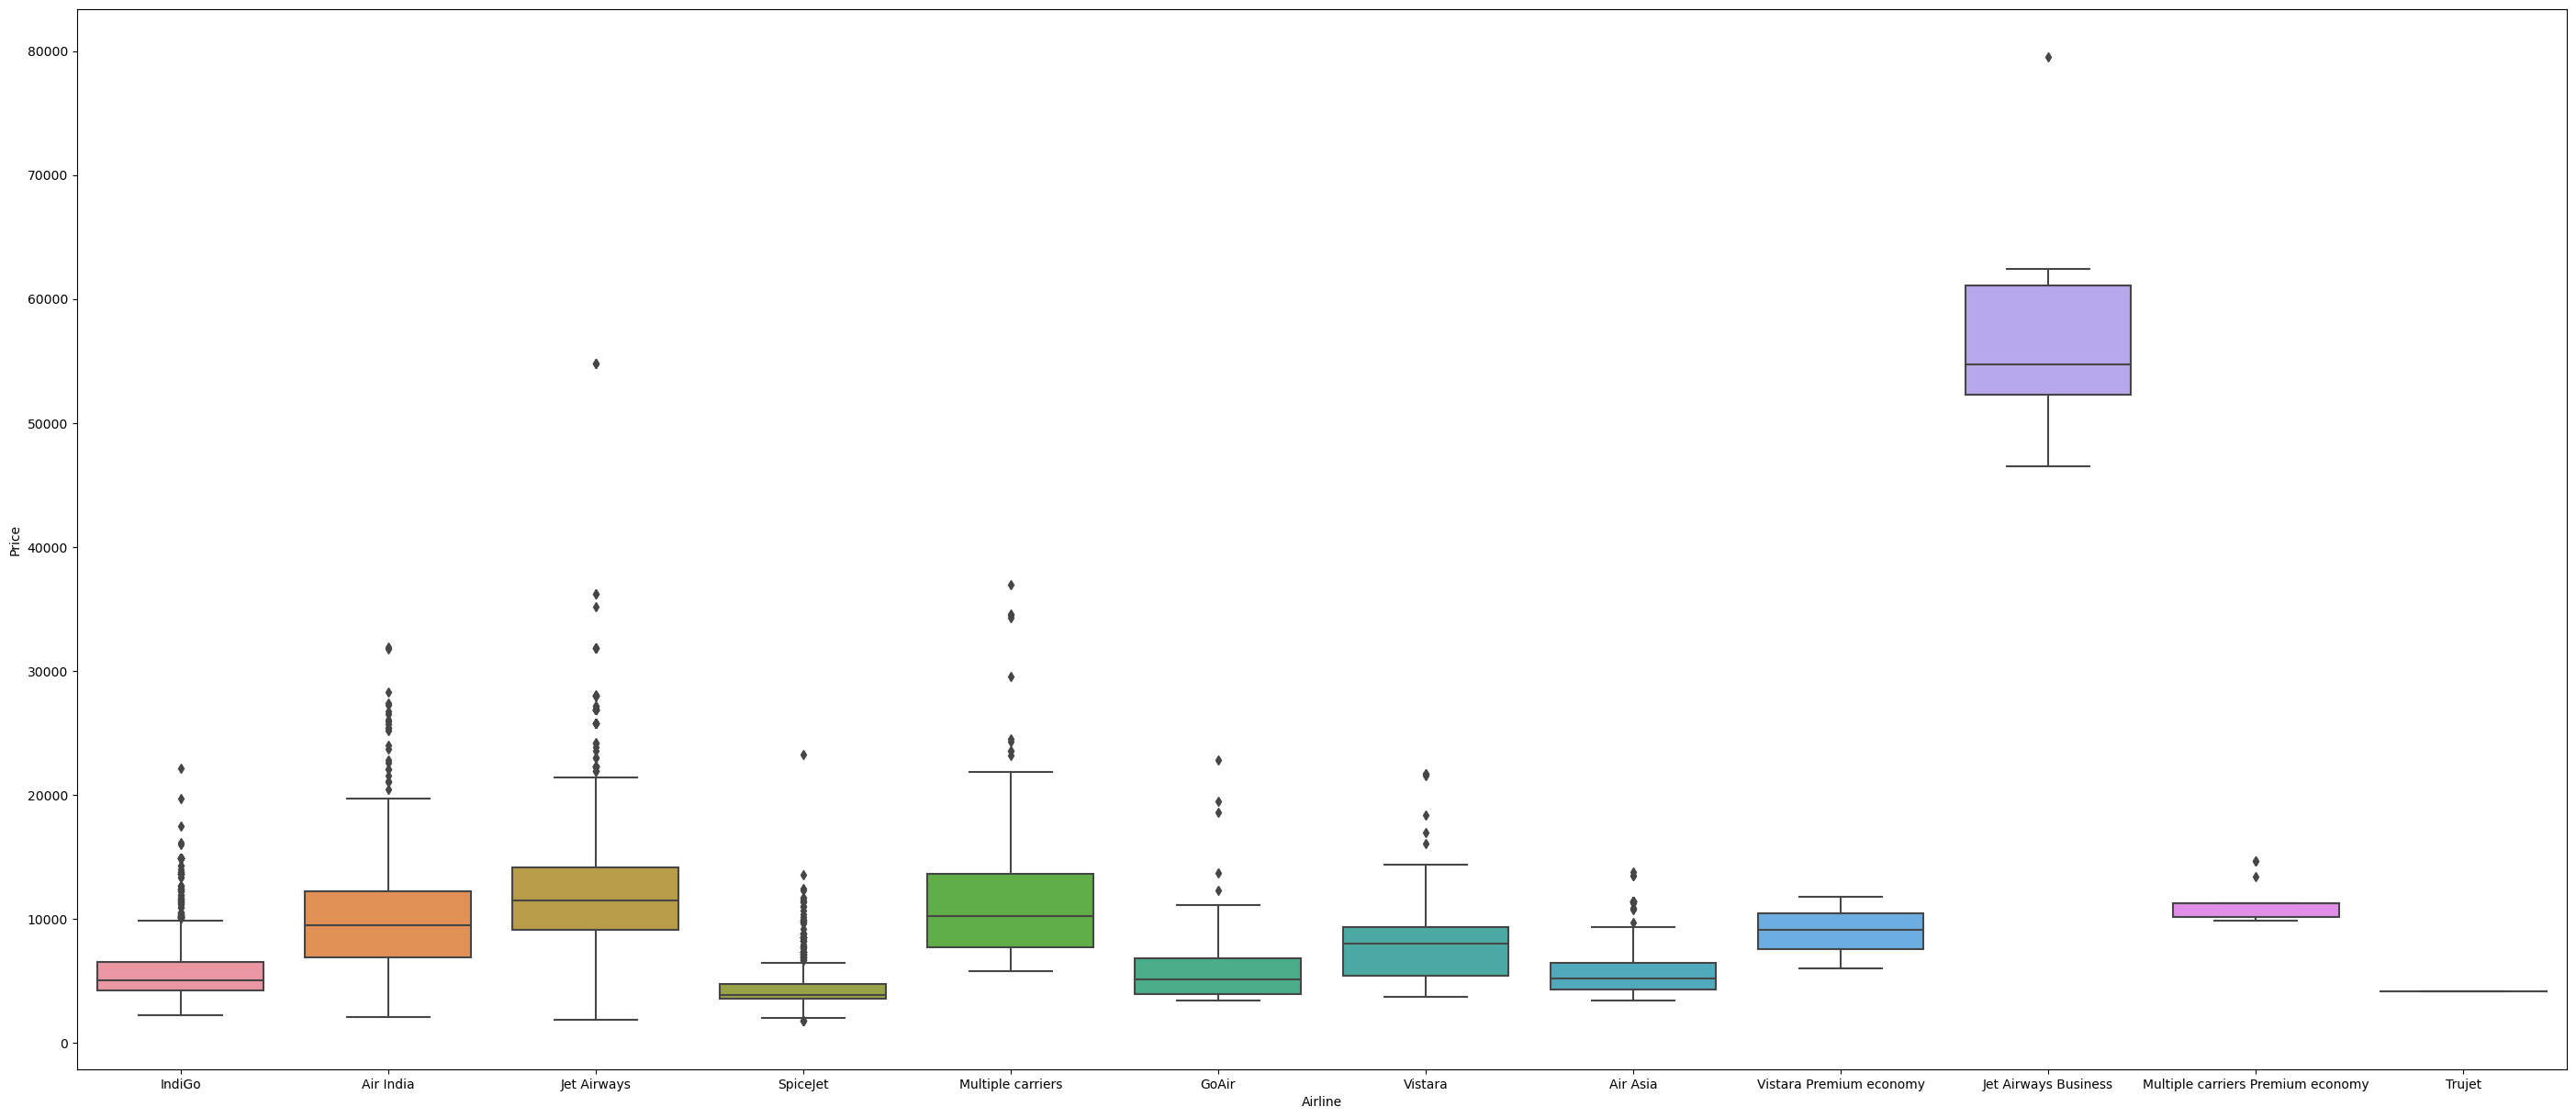

In [10]:
plt.figure(figsize=(35,15))
sns.boxplot(data=df,x="Airline",y="Price")

As shown above we can conclude that jet airways have highest amount of flight prices.

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

<AxesSubplot: >

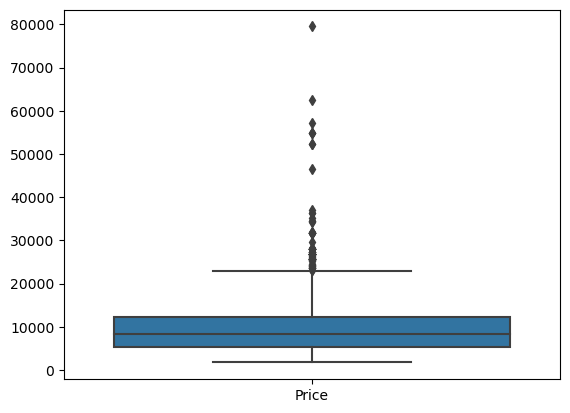

In [12]:
sns.boxplot(data=df)

As shown in the above example the outliers are present in the dataset.They impact to the prices mean,median and percentile which are more needed to do Analysis.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

In [13]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [14]:
df["Day"]=df["Day"].astype(int)
df["Month"]=df["Month"].astype(int)
df["Year"]=df["Year"].astype(int)

In [15]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [17]:
df["Month"].value_counts()

5    3466
6    3414
3    2724
4    1079
Name: Month, dtype: int64

<AxesSubplot: xlabel='Month', ylabel='Count'>

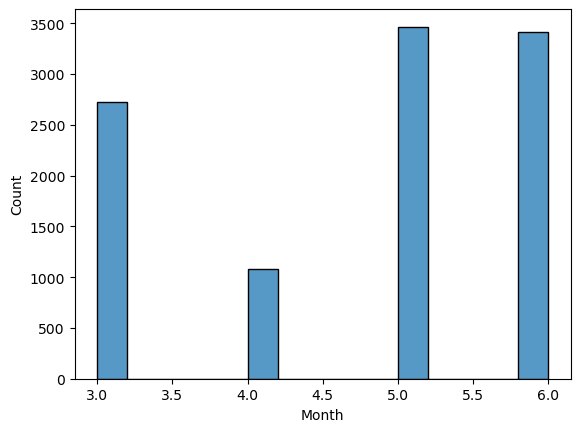

In [18]:
sns.histplot(data=df,x='Month')

As from above we can conclude that month-5(May) and month-6(June) have highest number of flights booking and they come under Summer Season.

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

<AxesSubplot: xlabel='Month', ylabel='Price'>

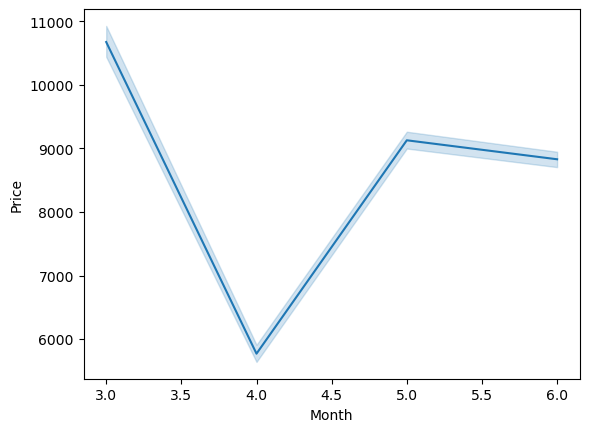

In [19]:
sns.lineplot(data=df,x="Month",y="Price")

As shown from above the prices range from highest in the month of March(3rd month) and the lowest in the April(4th month).
features to identify:-
1.We can analyze Flight tickests booking as per month
2.hightest price booking and lowest in the month

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
one=OneHotEncoder()

In [22]:
df1=pd.DataFrame(one.fit_transform(df[['Airline']]).toarray(),columns=one.get_feature_names_out())

In [23]:
final=pd.concat([df,df1],axis=1)

In [24]:
final.drop(['Airline'],axis=1,inplace=True)

In [25]:
final.head()

,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
final["Duration_Hours"]=final['Duration'].str.split(" ").str[0].str.split("h").str[0]
final["Duration_Minutes"]=final['Duration'].str.split(" ").str[1].str.split("m").str[0]
final["Duration_Minutes"].fillna('00',inplace=True)

In [27]:
final["Duration_Hours"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [28]:
final[final["Duration_Hours"]=="5m"]

,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,...,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Duration_Hours,Duration_Minutes
6474,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5m,00


In [29]:
final.drop(index=6474,inplace=True)

In [30]:
final["Duration_Hours"]=final["Duration_Hours"].astype(int)
final["Duration_Minutes"]=final["Duration_Minutes"].astype(int)

In [31]:
final["Total_Stops"]=final["Total_Stops"].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [32]:
final.head()

,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,...,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Duration_Hours,Duration_Minutes
0,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,50
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,25
2,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,0
3,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,25
4,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,45


In [33]:
final.corr()

/tmp/ipykernel_89/3701051463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final.corr()


,Total_Stops,Price,Day,Month,Year,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Duration_Hours,Duration_Minutes
Total_Stops,1.000000,0.603768,-0.009329,0.054642,NaN,-0.094412,0.270819,-0.060100,-0.302965,0.215197,0.017882,0.118465,0.009095,-0.274349,0.002521,-0.120434,-0.020460,0.740224,-0.136493
Price,0.603768,1.000000,-0.153619,-0.103431,NaN,-0.133034,0.049987,-0.095138,-0.361025,0.416334,0.253344,0.139884,0.017659,-0.296550,-0.010380,-0.060619,-0.000451,0.508985,-0.124673
Day,-0.009329,-0.153619,1.000000,-0.038505,NaN,0.008926,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115,-0.022283,-0.009112
Month,0.054642,-0.103431,-0.038505,1.000000,NaN,0.005624,-0.045622,-0.004516,-0.048587,0.059621,-0.034795,0.053633,-0.051233,-0.012025,-0.014201,-0.017289,-0.019801,0.016012,-0.041076
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airline_Air Asia,-0.094412,-0.133034,0.008926,0.005624,NaN,1.000000,-0.077687,-0.023862,-0.085579,-0.131680,-0.004159,-0.062298,-0.006124,-0.050525,-0.001698,-0.038015,-0.002941,-0.104357,0.085784
Airline_Air India,0.270819,0.049987,-0.032490,-0.045622,NaN,-0.077687,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,-0.015456,-0.127510,-0.004284,-0.095939,-0.007421,0.262270,-0.032992
Airline_GoAir,-0.060100,-0.095138,-0.003122,-0.004516,NaN,-0.023862,-0.060221,1.000000,-0.066339,-0.102076,-0.003224,-0.048292,-0.004747,-0.039166,-0.001316,-0.029469,-0.002280,-0.094075,0.067193
Airline_IndiGo,-0.302965,-0.361025,0.007281,-0.048587,NaN,-0.085579,-0.215977,-0.066339,1.000000,-0.366085,-0.011563,-0.173196,-0.017026,-0.140464,-0.004720,-0.105686,-0.008175,-0.346340,0.119730
Airline_Jet Airways,0.215197,0.416334,-0.017304,0.059621,NaN,-0.131680,-0.332324,-0.102076,-0.366085,1.000000,-0.017793,-0.266497,-0.026199,-0.216132,-0.007262,-0.162619,-0.012580,0.306994,-0.084203


From Above we can conclude that Airline,Mothh,Duration,Total Stops Have the advance effect on the flights dataset.

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.shape

(10841, 13)

In [7]:
df.size

140933

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

In [8]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<AxesSubplot: xlabel='Category', ylabel='Rating'>

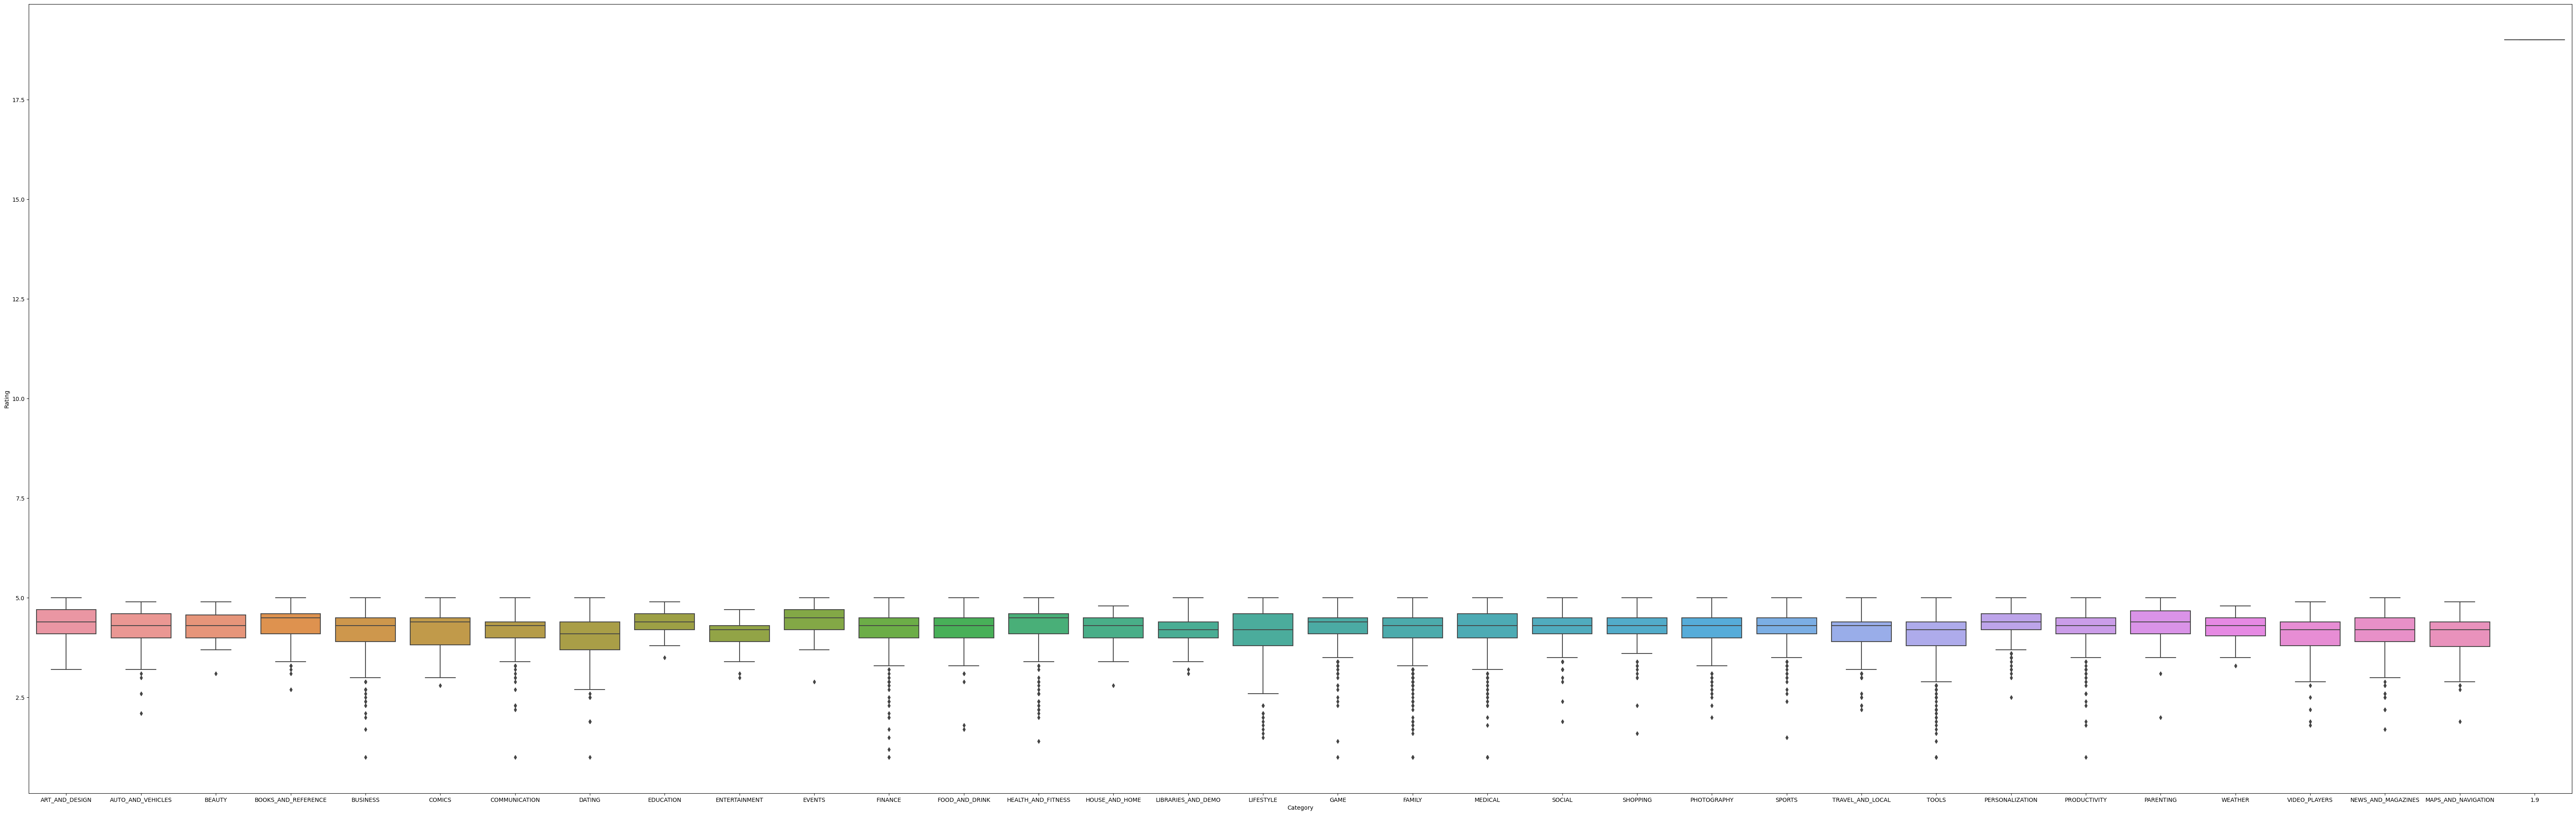

In [9]:
plt.figure(figsize=(80,25))
sns.boxplot(data=df,x="Category",y="Rating")

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [10]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
df['Rating'].fillna(df["Rating"].median(),inplace=True)

In [12]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

The missing values can lower the accuracy of the model,so always replace missing values with mean,median,or mode.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [16]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
df["Size"]=df["Size"].str.replace("M","000")
df["Size"]=df["Size"].str.replace("k","")
df["Size"]=df["Size"].replace("Varies with device",np.nan)
df["Size"]=df["Size"].astype(float)

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df.corr()

/tmp/ipykernel_109/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Size
Rating,1.000000,0.064545
Size,0.064545,1.000000


As from we can conclude that Rating and size have positive correlation.

<AxesSubplot: xlabel='Rating', ylabel='Size'>

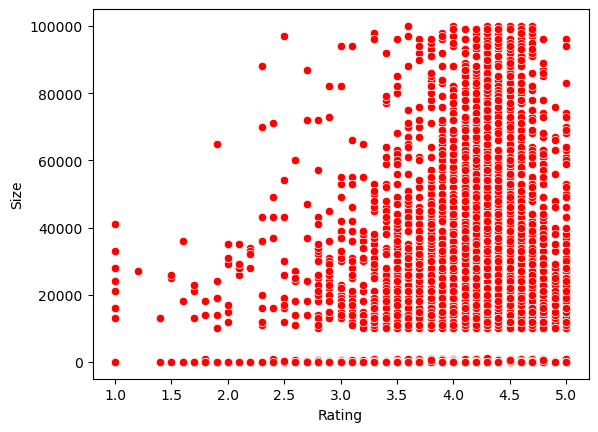

In [21]:
sns.scatterplot(data=df,x="Rating",y="Size",color="r")

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            9135 non-null   float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [25]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [26]:
df["Price"]=df["Price"].str.replace("$","")

/tmp/ipykernel_109/2278851203.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"]=df["Price"].str.replace("$","")


In [27]:
df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [28]:
df["Price"]=df["Price"].astype(float)

<AxesSubplot: xlabel='Category', ylabel='Price'>

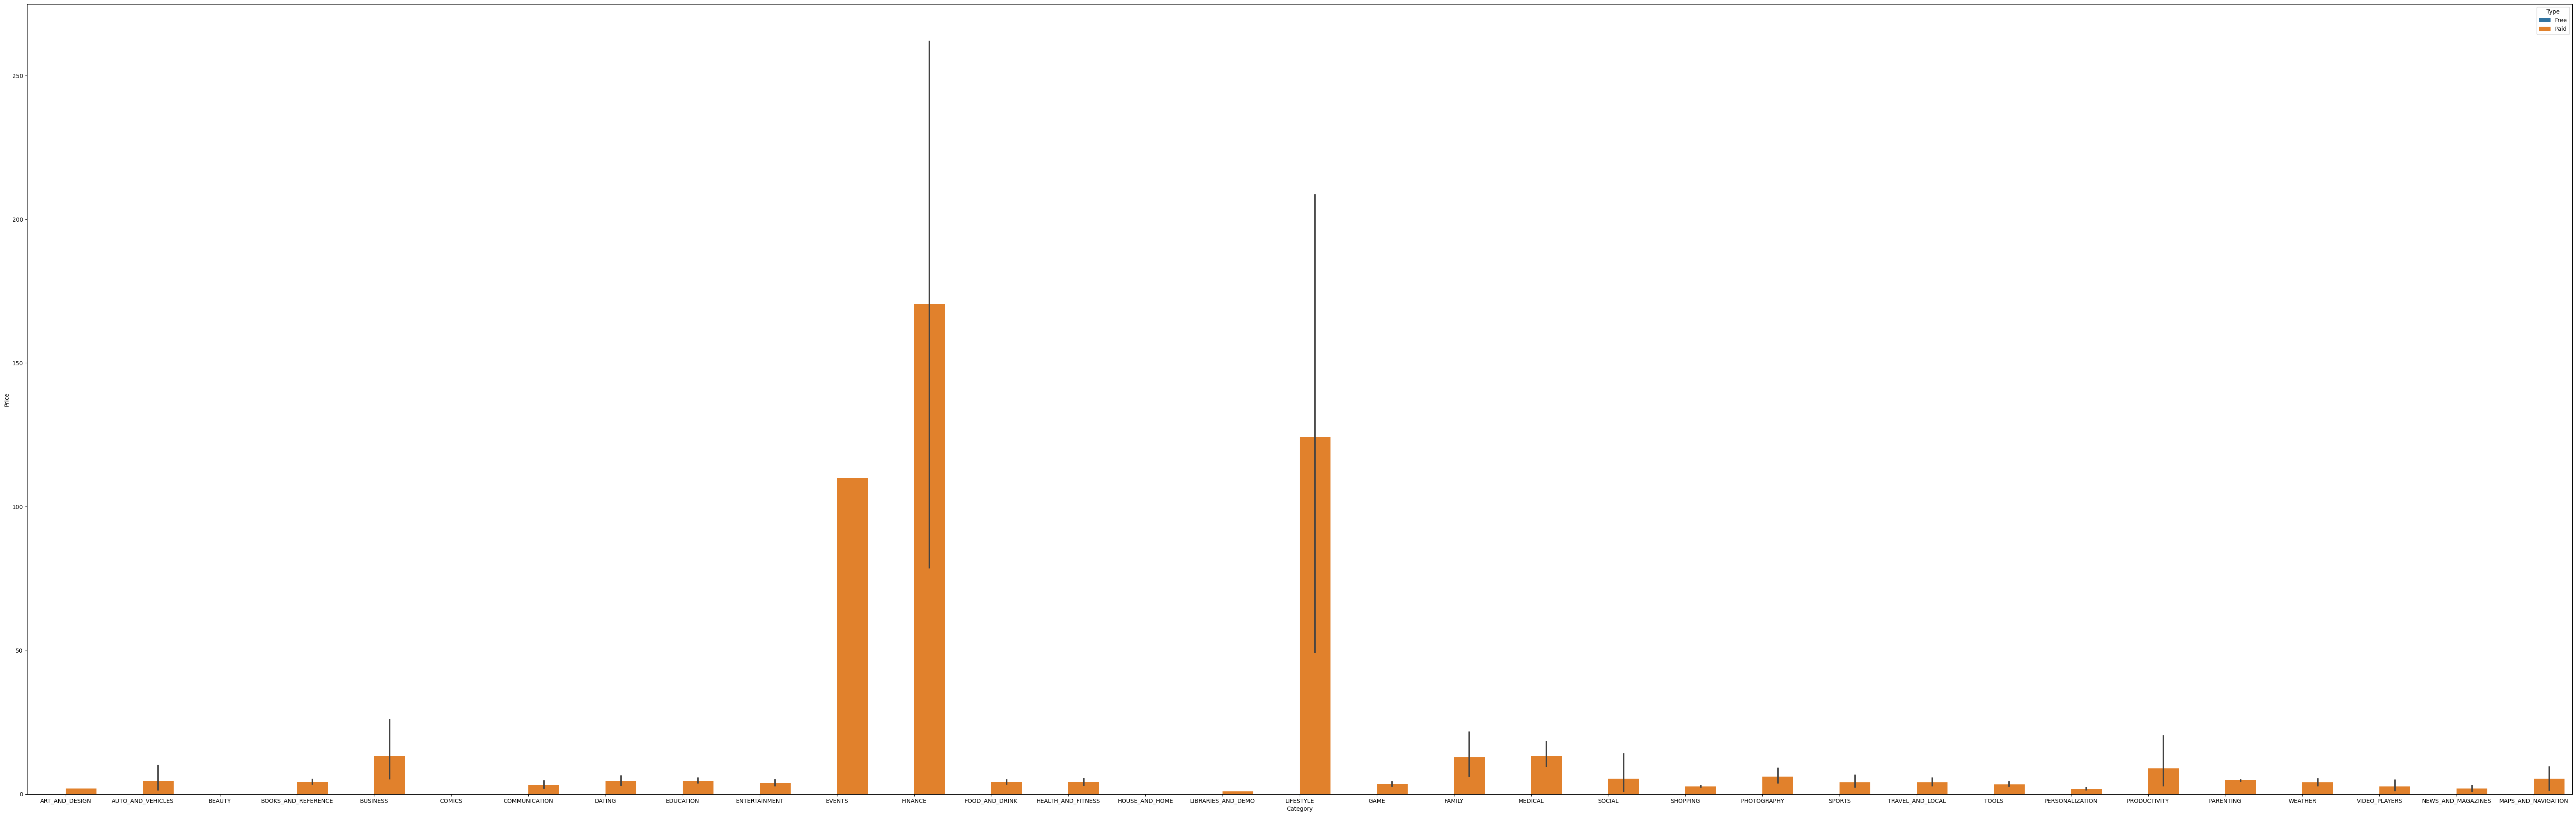

In [29]:
plt.figure(figsize=(80,25))
sns.barplot(data=df,x="Category",y="Price",hue="Type")

In [30]:
df["Type"]=df["Type"].map({'Free':0,"Paid":1})

In [31]:
df.corr()

/tmp/ipykernel_109/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Size,Type,Price
Rating,1.000000,0.064545,0.039095,-0.019330
Size,0.064545,1.000000,-0.024794,-0.022822
Type,0.039095,-0.024794,1.000000,0.228583
Price,-0.019330,-0.022822,0.228583,1.000000


As from above we conclude that Type& Price has Positive correlation.

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [40]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9905,Eu sou Rico,FINANCE,4.3,0,2.6,0+,1,30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40000.0,0+,1,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
8871,Test Application DT 02,ART_AND_DESIGN,4.3,0,1.2,0+,0,0.00,Everyone,Art & Design,"March 14, 2017",4.0,4.2 and up
9917,Eu Sou Rico,FINANCE,4.3,0,1.4,0+,1,394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up
5307,Ak Parti Yardım Toplama,SOCIAL,4.3,0,8.7,0+,1,13.99,Teen,Social,"July 28, 2017",3.4.4.3.3,4.1 and up


In [41]:
df=df.sort_values(by=['Installs'])

In [50]:
popular=pd.DataFrame(df.tail(10)[["App","Installs"]],columns=["App","Installs"])
popular.reset_index(inplace=True)

In [53]:
popular.drop(["index"],axis=1,inplace=True)

In [54]:
popular

,App,Installs
0,Microsoft Word,"500,000,000+"
1,Microsoft Word,"500,000,000+"
2,MX Player,"500,000,000+"
3,imo free video calls and chat,"500,000,000+"
4,Facebook Lite,"500,000,000+"
5,Google Duo - High Quality Video Calls,"500,000,000+"
6,LINE: Free Calls & Messages,"500,000,000+"
7,Viber Messenger,"500,000,000+"
8,Gboard - the Google Keyboard,"500,000,000+"
9,Temple Run 2,"500,000,000+"


Above are the most popular apps in the dataset.

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

In [58]:
df["Category"].value_counts()

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: ylabel='Category'>

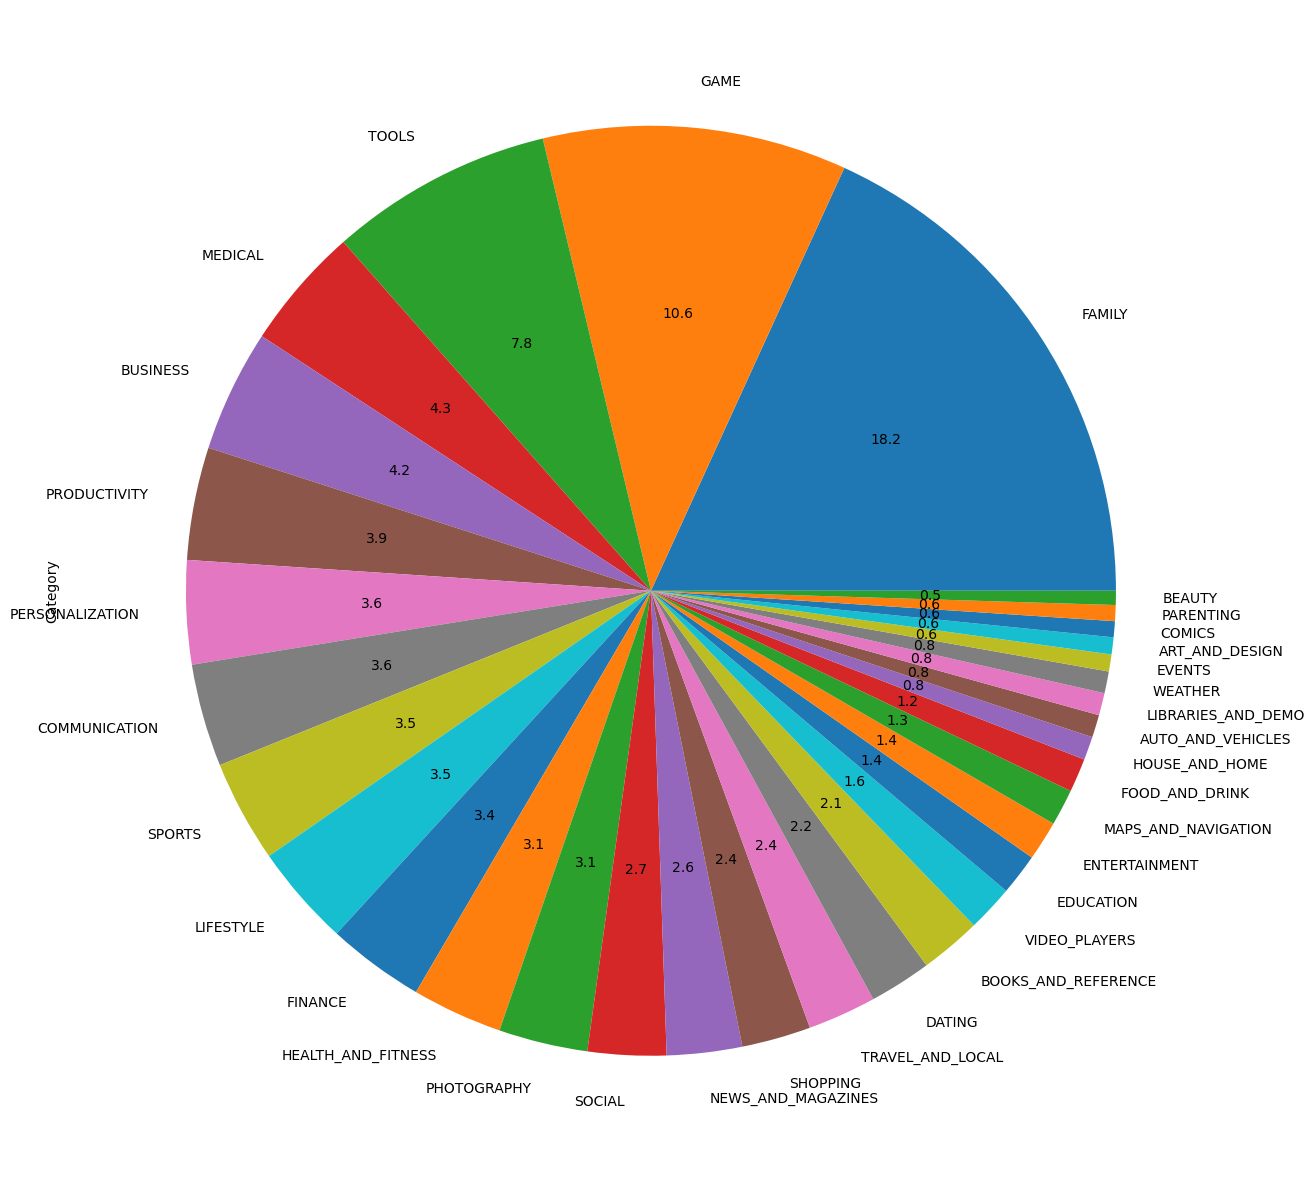

In [61]:
df['Category'].value_counts().plot.pie(y=df["Category"],figsize=(15,16),autopct="%1.1f")

From above we can conclude that app can be launched in Family,game,tools,medical,business Categories